In [2]:
DATA_PATH = r'..\data\processed\04-final_data_v2.pkl'


X_data = r'..\data\processed\Train And test F_selection\X_Data.pkl'
y_data = r'..\data\processed\Train And test F_selection\y_Data.pkl'

DATA_X_TRAIN = r'..\data\processed\Train And test F_selection\X_train.pkl'
DATA_X_TEST = r'..\data\processed\Train And test F_selection\X_test.pkl'
DATA_y_TRAIN = r'..\data\processed\Train And test F_selection\y_train.pkl'
DATA_y_TEST = r'..\data\processed\Train And test F_selection\y_test.pkl'

preperocessor_path = r'..\models\preperocessor.pkl'
final_model_path = r'..\models\final_model.pkl'

MLFLOW_TRACKING_URI = '../models/mlruns'
MLFLOW_EXPERIMENT_NAME = "Modling_after_F_selection_HP"

LOG_PATH = r"..\models\temp"
LOG_DATA_PKL = "data.pkl"
LOG_MODEL_PKL = "model.pkl"
LOG_METRICS_PKL = "metrics.pkl"

## Importing


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

import mlflow
from mlflow.tracking import MlflowClient

import pickle
import joblib


from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Set the maximum number of rows and columns to display
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [4]:
X = pd.read_pickle(X_data)
y = pd.read_pickle(y_data)


X_train = pd.read_pickle(DATA_X_TRAIN)
X_test = pd.read_pickle(DATA_X_TEST)

y_train = pd.read_pickle(DATA_y_TRAIN)
y_test = pd.read_pickle(DATA_y_TEST)

In [5]:
# X

In [6]:
X_train

,num_pipeline__Java,num_pipeline__Zig,num_pipeline__Cobol,num_pipeline__JavaScript,num_pipeline__Kotlin,num_pipeline__R,num_pipeline__Haskell,num_pipeline__Dart,num_pipeline__HTML/CSS,num_pipeline__F#,...,num_pipeline__PhpStorm,num_pipeline__VSCodium,num_pipeline__Atom,num_pipeline__Neovim,"num_pipeline__Rad Studio (Delphi, C++ Builder)",num_pipeline__DataGrip,num_pipeline__RStudio,num_pipeline__Helix,num_pipeline__Visual Studio,num_pipeline__experanse_years
0,-0.591926,-0.103448,-0.091302,-1.036934,-0.297156,-0.260248,-0.145651,-0.223863,1.174459,-0.083736,...,-0.210249,-0.209601,-0.239894,-0.372150,-0.140129,-0.203084,-0.203953,-0.130729,-0.553552,0.171687
1,-0.591926,-0.103448,-0.091302,0.964381,-0.297156,-0.260248,-0.145651,-0.223863,1.174459,-0.083736,...,-0.210249,-0.209601,-0.239894,-0.372150,-0.140129,-0.203084,-0.203953,-0.130729,-0.553552,0.171687
2,-0.591926,-0.103448,-0.091302,0.964381,-0.297156,-0.260248,-0.145651,-0.223863,1.174459,-0.083736,...,-0.210249,-0.209601,-0.239894,2.687087,-0.140129,-0.203084,-0.203953,-0.130729,-0.553552,0.171687
3,1.689399,-0.103448,-0.091302,0.964381,-0.297156,-0.260248,-0.145651,-0.223863,-0.851456,-0.083736,...,-0.210249,-0.209601,-0.239894,-0.372150,-0.140129,-0.203084,-0.203953,-0.130729,-0.553552,-1.154115
4,-0.591926,-0.103448,-0.091302,-1.036934,-0.297156,-0.260248,-0.145651,-0.223863,-0.851456,-0.083736,...,-0.210249,-0.209601,-0.239894,2.687087,-0.140129,-0.203084,-0.203953,-0.130729,-0.553552,-1.033587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52129,-0.591926,-0.103448,-0.091302,0.964381,-0.297156,-0.260248,-0.145651,-0.223863,1.174459,-0.083736,...,-0.210249,-0.209601,-0.239894,-0.372150,-0.140129,-0.203084,-0.203953,-0.130729,-0.553552,-0.913060
52130,-0.591926,-0.103448,-0.091302,-1.036934,-0.297156,3.842492,-0.145651,-0.223863,-0.851456,-0.083736,...,-0.210249,-0.209601,-0.239894,-0.372150,-0.140129,-0.203084,4.903096,-0.130729,-0.553552,-1.033587
52131,-0.591926,-0.103448,-0.091302,-1.036934,-0.297156,-0.260248,-0.145651,-0.223863,-0.851456,-0.083736,...,-0.210249,-0.209601,-0.239894,-0.372150,-0.140129,-0.203084,-0.203953,-0.130729,1.806514,-0.913060
52132,1.689399,-0.103448,-0.091302,0.964381,-0.297156,-0.260248,-0.145651,-0.223863,1.174459,-0.083736,...,-0.210249,-0.209601,-0.239894,-0.372150,-0.140129,-0.203084,-0.203953,-0.130729,1.806514,-0.069368


## Initialize MLflow


In [7]:
# Initialize client and experiment
mlflow.set_experiment(MLFLOW_EXPERIMENT_NAME)

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
client = MlflowClient()
mlflow.get_experiment_by_name(MLFLOW_EXPERIMENT_NAME)
exp = client.get_experiment_by_name(MLFLOW_EXPERIMENT_NAME)

In [6]:
exp

<Experiment: artifact_location=('file:///c:/Users/xobed/OneDrive/Desktop/Data_science_And_ML_projects/project4 '
 '- SkillMAP (end to end data science '
 'project)/SkillMap-End-to-End-data-science-project/notebooks/../models/mlruns/979592220793297931'), creation_time=1704410125247, experiment_id='979592220793297931', last_update_time=1704410125247, lifecycle_stage='active', name='Modling_after_F_selection_HP', tags={}>

# Modeling

---


### 1)choose model


In [6]:
def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'KNeighbors': KNeighborsClassifier(),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'SVM': SVC()
    }

    results = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, train_preds)
        test_accuracy = accuracy_score(y_test, test_preds)

        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        }

        print(results)

    return results

In [7]:
evaluate_models(X_train, y_train, X_test, y_test)

In [ ]:
scores = {'KNeighbors': {'train_accuracy': 0.7311743407819186,
                         'test_accuracy': 0.5938244741477567},
          'DecisionTree': {'train_accuracy': 0.999890282704897,
                           'test_accuracy': 0.7397160915967257},
          'RandomForest': {'train_accuracy': 0.999890282704897,
                           'test_accuracy': 0.8163920837218941},
          'AdaBoost': {'train_accuracy': 0.3117616940350364,
                       'test_accuracy': 0.30141954201637133},
          'GradientBoosting': {'train_accuracy': 0.5306476977654244,
                               'test_accuracy': 0.4878250958449902},
          'SVM': {'train_accuracy': 0.7891965036755294,
                  'test_accuracy': 0.6664594342555176}}

scores = pd.DataFrame(scores).T

In [ ]:
scores.sort_values(by='test_accuracy', ascending=False)

,train_accuracy,test_accuracy
RandomForest,0.999890,0.816392
DecisionTree,0.999890,0.739716
SVM,0.789197,0.666459
KNeighbors,0.731174,0.593824
GradientBoosting,0.530648,0.487825
AdaBoost,0.311762,0.301420


The best model is Random Forest

Training Accuracy: 99.83%
Testing Accuracy: 81.49%

Insight: The Random Forest model shows high accuracy on the training set but slightly lower accuracy on the testing set. This might indicate overfitting to the training data so we need some hyperparameter tuning


# hyperparameter tuning


Since the number of features we have is large and most of them are highly correlated, we will use PCA to reduce this problem and improve Computational Efficiency


In [6]:
pca_model = PCA(n_components=0.9, random_state=42)
random_f = RandomForestClassifier(random_state=42)
pipe_model = Pipeline(
    [
        ('pca_model', pca_model),
        ('random_f', random_f)
    ]
)

In [7]:
param_grid = {
    'random_f__n_estimators': [50, 100, 128],
    'random_f__max_depth': [8, 10, None],
    'random_f__max_features': ['sqrt', 'log2'],
    'random_f__bootstrap': [True, False],
}

In [8]:
# Create the GridSearchCV model
grid_search = GridSearchCV(pipe_model, param_grid,
                           cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END random_f__bootstrap=True, random_f__max_depth=8, random_f__max_features=sqrt, random_f__n_estimators=50; total time=  28.2s
[CV] END random_f__bootstrap=True, random_f__max_depth=8, random_f__max_features=sqrt, random_f__n_estimators=50; total time=  26.4s
[CV] END random_f__bootstrap=True, random_f__max_depth=8, random_f__max_features=sqrt, random_f__n_estimators=50; total time=  32.4s
[CV] END random_f__bootstrap=True, random_f__max_depth=8, random_f__max_features=sqrt, random_f__n_estimators=100; total time=  56.9s
[CV] END random_f__bootstrap=True, random_f__max_depth=8, random_f__max_features=sqrt, random_f__n_estimators=100; total time=  56.2s
[CV] END random_f__bootstrap=True, random_f__max_depth=8, random_f__max_features=sqrt, random_f__n_estimators=100; total time=  52.0s
[CV] END random_f__bootstrap=True, random_f__max_depth=8, random_f__max_features=sqrt, random_f__n_estimators=128; total time= 1.1min
[CV

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca_model',
                                        PCA(n_components=0.9, random_state=42)),
                                       ('random_f',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'random_f__bootstrap': [True, False],
                         'random_f__max_depth': [8, 10, None],
                         'random_f__max_features': ['sqrt', 'log2'],
                         'random_f__n_estimators': [50, 100, 128]},
             scoring='accuracy', verbose=2)

In [9]:
grid_search.best_estimator_

Pipeline(steps=[('pca_model', PCA(n_components=0.9, random_state=42)),
                ('random_f',
                 RandomForestClassifier(bootstrap=False, n_estimators=128,
                                        random_state=42))])

In [10]:
grid_search.best_params_

{'random_f__bootstrap': False,
 'random_f__max_depth': None,
 'random_f__max_features': 'sqrt',
 'random_f__n_estimators': 128}

In [11]:
grid_search.best_score_

0.7712899158938225

In [13]:
pd.DataFrame(grid_search.cv_results_).sort_values(
    by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_f__bootstrap,param_random_f__max_depth,param_random_f__max_features,param_random_f__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
32,160.105024,9.879874,1.078127,0.099833,False,None,sqrt,128,"{'random_f__bootstrap': False, 'random_f__max_...",0.772395,0.764572,0.776903,0.771290,0.005094,1
35,77.560797,0.266796,1.035285,0.012793,False,None,log2,128,"{'random_f__bootstrap': False, 'random_f__max_...",0.769235,0.763225,0.774727,0.769062,0.004697,2
31,122.155169,7.733244,0.972913,0.171354,False,None,sqrt,100,"{'random_f__bootstrap': False, 'random_f__max_...",0.769701,0.761152,0.774986,0.768613,0.005700,3
14,133.934440,3.315413,1.020402,0.007814,True,None,sqrt,128,"{'random_f__bootstrap': True, 'random_f__max_d...",0.768976,0.759857,0.775659,0.768164,0.006477,4
34,60.884742,0.569337,0.844043,0.015075,False,None,log2,100,"{'random_f__bootstrap': False, 'random_f__max_...",0.768354,0.761515,0.771877,0.767249,0.004302,5


### hyperparameter tuning 2


In [9]:
pca_model = PCA(n_components=250, random_state=42)
random_f = RandomForestClassifier(
    bootstrap=False, max_features='sqrt', random_state=42)
pipe_model = Pipeline(
    [
        ('pca_model', pca_model),
        ('random_f', random_f)
    ]
)
param_grid = {
    'random_f__n_estimators': [1000],
    'random_f__max_depth': [10, 15],
}
# Create the GridSearchCV model
grid_search2 = GridSearchCV(pipe_model, param_grid,
                            cv=3, scoring='accuracy', verbose=2)
grid_search2.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END random_f__max_depth=10, random_f__n_estimators=1000; total time=13.0min
[CV] END random_f__max_depth=10, random_f__n_estimators=1000; total time=11.7min


In [62]:
grid_search2.best_estimator_

Pipeline(memory=None,
         steps=[('pca_model',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     n_oversamples=10, power_iteration_normalizer='auto',
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('random_f',
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=15, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [63]:
grid_search2.best_params_

{'random_f__max_depth': 15, 'random_f__n_estimators': 200}

In [64]:
pd.DataFrame(grid_search2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_f__max_depth,param_random_f__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,35.770424,0.908752,0.521362,0.032854,10,128,"{'random_f__max_depth': 10, 'random_f__n_estim...",0.526139,0.522003,0.529338,0.525827,0.003002,9
1,40.913374,0.816013,0.669266,0.028723,10,150,"{'random_f__max_depth': 10, 'random_f__n_estim...",0.526035,0.526404,0.526404,0.526281,0.000174,8
2,53.154323,1.491403,0.846413,0.032209,10,200,"{'random_f__max_depth': 10, 'random_f__n_estim...",0.526663,0.524518,0.531643,0.527608,0.002984,7
3,46.957825,2.443122,0.712270,0.028862,15,128,"{'random_f__max_depth': 15, 'random_f__n_estim...",0.606915,0.605826,0.604778,0.605839,0.000872,6
4,53.401847,1.781629,0.799673,0.050848,15,150,"{'random_f__max_depth': 15, 'random_f__n_estim...",0.605343,0.611169,0.606873,0.607795,0.002466,4
5,74.250953,0.409594,1.169539,0.099528,15,200,"{'random_f__max_depth': 15, 'random_f__n_estim...",0.613620,0.608759,0.609807,0.610729,0.002088,1
6,57.714573,1.996829,0.891449,0.013103,None,128,"{'random_f__max_depth': None, 'random_f__n_est...",0.610896,0.606664,0.606769,0.608109,0.001971,3
7,65.856705,3.665094,1.078987,0.133362,None,150,"{'random_f__max_depth': None, 'random_f__n_est...",0.606496,0.610017,0.602997,0.606503,0.002866,5
8,86.885591,4.147374,1.353708,0.056150,None,200,"{'random_f__max_depth': None, 'random_f__n_est...",0.606915,0.612217,0.611274,0.610135,0.002310,2


---


### 5) final evaluation


In [6]:
train_acc = []
test_acc = []
for i in range(1, 30):
    random_f = RandomForestClassifier(
        bootstrap=False, max_features='sqrt', max_depth=i, n_estimators=200, min_samples_split=3, n_jobs=8, random_state=42)
    random_f.fit(X_train, y_train)
    train_preds = random_f.predict(X_train)
    test_preds = random_f.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    print('depth=', i)

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

depth= 1
depth= 2
depth= 3
depth= 4
depth= 5
depth= 6
depth= 7
depth= 8
depth= 9
depth= 10
depth= 11
depth= 12
depth= 13
depth= 14
depth= 15
depth= 16
depth= 17
depth= 18
depth= 19
depth= 20
depth= 21
depth= 22
depth= 23
depth= 24
depth= 25
depth= 26
depth= 27
depth= 28
depth= 29


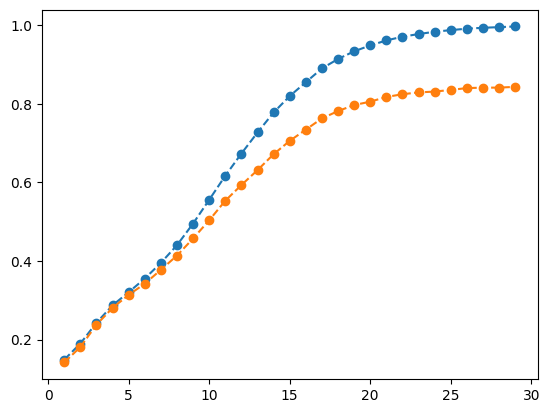

In [12]:
plt.plot(range(1, 30), train_acc, '--o')
plt.plot(range(1, 30), test_acc, '--o')

depth= 1
depth= 2
depth= 3
depth= 4
depth= 5
depth= 6
depth= 7
depth= 8
depth= 9
depth= 10
depth= 11
depth= 12
depth= 13
depth= 14
depth= 15
depth= 16
depth= 17
depth= 18
depth= 19
depth= 20
depth= 21
depth= 22
depth= 23
depth= 24
depth= 25
depth= 26
depth= 27
depth= 28
depth= 29


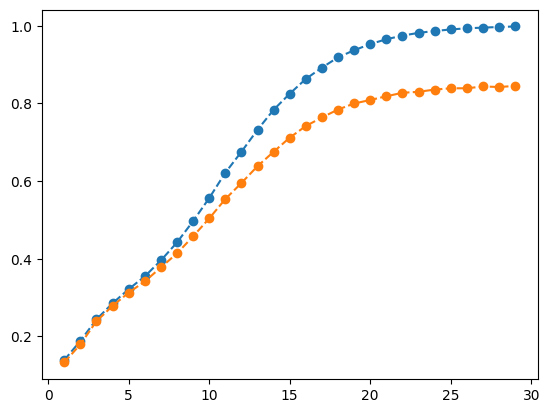

In [6]:
train_acc = []
test_acc = []
for i in range(1, 30):
    random_f = RandomForestClassifier(
        bootstrap=False, max_features='sqrt', max_depth=i, n_estimators=300, min_samples_split=2, n_jobs=8, random_state=42)
    random_f.fit(X_train, y_train)
    train_preds = random_f.predict(X_train)
    test_preds = random_f.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    print('depth=', i)

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

---


In [25]:
pca_model = PCA(n_components=40, random_state=42)
pca_model.fit(X_train, y_train)

PCA(n_components=40, random_state=42)

In [27]:
pca_model.explained_variance_ratio_.sum()

0.3887905285429535

In [13]:
pca_model = PCA(n_components=150, random_state=42)
random_f = RandomForestClassifier(
    bootstrap=False, max_features='sqrt', max_depth=15, n_estimators=100, min_samples_split=4, n_jobs=8, random_state=42)
pipe_model = Pipeline(
    [
        ('pca_model', pca_model),
        ('random_f', random_f)
    ]
)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('pca_model', PCA(n_components=150, random_state=42)),
                ('random_f',
                 RandomForestClassifier(bootstrap=False, max_depth=15,
                                        min_samples_split=4, n_jobs=8,
                                        random_state=42))])

In [17]:
train_preds = pipe_model.predict(X_train)
test_preds = pipe_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)

In [15]:
test_accuracy = accuracy_score(y_test, test_preds)
test_accuracy

0.8007825236387349

In [16]:
print(classification_report(y_test, test_preds))

                               precision    recall  f1-score   support

          Academic Researcher       0.84      0.74      0.79       382
           Back-end Developer       0.49      0.54      0.52       713
         Blockchain Developer       0.98      1.00      0.99       423
Cloud Infrastructure Engineer       0.93      0.81      0.87       428
                Data Engineer       0.88      0.81      0.84       366
 Data Scientist/ML Specialist       0.71      0.83      0.77       367
        Data/Business Analyst       0.89      0.88      0.89       376
       Database Administrator       0.95      1.00      0.97       403
            DevOps Specialist       0.92      0.70      0.79       407
         Developer Experience       1.00      0.98      0.99       408
           Embedded Developer       0.66      0.79      0.72       379
          Front-end Developer       0.62      0.77      0.68       722
         Full-stack Developer       0.45      0.44      0.44       752
     

note: the backend and fullstack don't perform well because they have varied skills so i think this is a reason for low accuracy in testing set
the model still have some overfitting but i think it's work well


loging


In [18]:
import os
import gzip

# Data details
data_details = {"data_path": DATA_PATH,
                "training_indices": X_train.index.tolist(),
                "test_indices":     X_test.index.tolist(),
                "features_names":   X.columns.tolist(),
                "targets_names":    y_train.tolist()}

with open(os.path.join(LOG_PATH, LOG_DATA_PKL), "wb") as output_file:
    pickle.dump(data_details, output_file)
# # Model
# model = {"model_description": "Random Forest: with  Hyperparamter tuning",
#          "model_details": str(random_f),
#          "model_object": random_f}

# with gzip.open(os.path.join(LOG_PATH, LOG_MODEL_PKL + '.gz'), 'wb') as output_file:
#     pickle.dump(model, output_file)

# Preformance details
classes_metrics = {"train_scores": train_accuracy,
                   "test_scores":  test_accuracy}

with open(os.path.join(LOG_PATH, LOG_METRICS_PKL), "wb") as output_file:
    pickle.dump(classes_metrics, output_file)
# Start a new run and track
with mlflow.start_run(experiment_id=exp.experiment_id,
                      run_name="Random Forest: with  Hyperparamter tuning"):
    # Log pickles
    mlflow.log_artifacts(LOG_PATH)

    # Track metrics

    mlflow.log_metric('train_scores', train_accuracy)
    mlflow.log_metric('test_scores', test_accuracy)

## 6)Interpretation of model parameters


In [15]:
random_f.classes_

array(['Academic Researcher', 'Back-end Developer',
       'Blockchain Developer', 'Cloud Infrastructure Engineer',
       'Data Engineer', 'Data Scientist/ML Specialist',
       'Data/Business Analyst', 'Database Administrator',
       'DevOps Specialist', 'Developer Experience', 'Embedded Developer',
       'Front-end Developer', 'Full-stack Developer',
       'Game/Graphics Developer', 'Hardware Engineer', 'Mobile Developer',
       'QA/Test Developer', 'R&D Developer', 'Security Professional',
       'Site Reliability Engineer', 'System Administrator'], dtype=object)

In [16]:
random_f.feature_importances_

array([8.04800155e-04, 9.57654812e-04, 6.41320793e-03, 5.64345701e-04,
       7.97193229e-04, 7.33743989e-03, 1.16294087e-02, 1.11316594e-02,
       2.40457360e-03, 3.32656234e-04, 1.20233799e-02, 3.32442779e-04,
       3.15694916e-03, 1.30974189e-03, 8.18212985e-03, 2.52834243e-03,
       1.51219587e-02, 1.91473391e-04, 7.03712710e-04, 1.53949504e-03,
       3.58014998e-03, 7.32698836e-03, 4.35541600e-03, 4.51379795e-03,
       2.17146427e-03, 1.26241457e-03, 1.17891291e-02, 4.14775997e-04,
       1.01853840e-02, 6.80620175e-03, 4.93702253e-03, 9.63979706e-04,
       1.08832474e-02, 7.16712901e-03, 5.51369899e-03, 8.82914704e-04,
       1.17777065e-03, 8.30502428e-03, 1.73015201e-03, 1.15856972e-02,
       3.54176723e-03, 1.11987629e-03, 3.50624990e-03, 3.04739977e-03,
       1.71017206e-03, 3.64071869e-03, 3.17051657e-04, 1.04639752e-02,
       1.95372697e-03, 1.16829082e-03, 9.91803211e-04, 9.57360524e-04,
       3.90148167e-03, 1.04484046e-02, 2.60245984e-04, 5.52285761e-03,
      

## 7) Final model


In [19]:
import joblib
preperocessor = joblib.load(preperocessor_path)
X_arr = preperocessor.fit_transform(X)

In [21]:
X_pre = pd.DataFrame(X_arr, columns=preperocessor.get_feature_names_out())

In [23]:
X_pre

,num_pipeline__Java,num_pipeline__Zig,num_pipeline__Cobol,num_pipeline__JavaScript,num_pipeline__Kotlin,num_pipeline__R,num_pipeline__Haskell,num_pipeline__Dart,num_pipeline__HTML/CSS,num_pipeline__F#,...,num_pipeline__PhpStorm,num_pipeline__VSCodium,num_pipeline__Atom,num_pipeline__Neovim,"num_pipeline__Rad Studio (Delphi, C++ Builder)",num_pipeline__DataGrip,num_pipeline__RStudio,num_pipeline__Helix,num_pipeline__Visual Studio,num_pipeline__experanse_years
0,-0.591566,-0.102929,-0.09075,0.962723,-0.297496,3.845999,-0.144706,-0.223337,1.174538,-0.082836,...,-0.210439,-0.209465,-0.237464,-0.371233,-0.139512,-0.202672,-0.204626,-0.130108,-0.552369,-1.033392
1,-0.591566,-0.102929,-0.09075,-1.038721,-0.297496,3.845999,-0.144706,-0.223337,1.174538,-0.082836,...,-0.210439,-0.209465,-0.237464,-0.371233,-0.139512,-0.202672,4.886957,-0.130108,-0.552369,-0.912830
2,-0.591566,-0.102929,-0.09075,-1.038721,-0.297496,-0.260010,-0.144706,-0.223337,-0.851399,-0.082836,...,-0.210439,-0.209465,-0.237464,-0.371233,-0.139512,-0.202672,-0.204626,-0.130108,-0.552369,-0.671705
3,1.690428,-0.102929,-0.09075,0.962723,3.361395,3.845999,-0.144706,4.477543,1.174538,-0.082836,...,-0.210439,-0.209465,-0.237464,2.693726,-0.139512,-0.202672,-0.204626,-0.130108,-0.552369,-0.068894
4,-0.591566,-0.102929,-0.09075,-1.038721,-0.297496,-0.260010,-0.144706,-0.223337,-0.851399,-0.082836,...,-0.210439,-0.209465,-0.237464,-0.371233,-0.139512,-0.202672,-0.204626,-0.130108,-0.552369,-0.792268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61330,1.690428,-0.102929,-0.09075,0.962723,-0.297496,-0.260010,-0.144706,-0.223337,1.174538,-0.082836,...,-0.210439,-0.209465,-0.237464,-0.371233,-0.139512,-0.202672,-0.204626,-0.130108,-0.552369,0.172231
61331,1.690428,-0.102929,-0.09075,-1.038721,-0.297496,-0.260010,-0.144706,-0.223337,-0.851399,-0.082836,...,-0.210439,-0.209465,-0.237464,-0.371233,-0.139512,-0.202672,-0.204626,-0.130108,-0.552369,0.413356
61332,-0.591566,-0.102929,-0.09075,0.962723,-0.297496,-0.260010,-0.144706,-0.223337,1.174538,-0.082836,...,-0.210439,-0.209465,-0.237464,-0.371233,-0.139512,-0.202672,-0.204626,-0.130108,-0.552369,2.342353
61333,-0.591566,-0.102929,-0.09075,-1.038721,-0.297496,-0.260010,-0.144706,-0.223337,-0.851399,-0.082836,...,-0.210439,-0.209465,-0.237464,-0.371233,-0.139512,-0.202672,-0.204626,-0.130108,-0.552369,-0.310018


In [24]:
pca_model = PCA(n_components=150, random_state=42)
random_f = RandomForestClassifier(
    bootstrap=False, max_features='sqrt', max_depth=15, n_estimators=100, min_samples_split=4, n_jobs=8, random_state=42)
pipe_model = Pipeline(
    [
        ('pca_model', pca_model),
        ('random_f', random_f)
    ]
)

In [25]:
pipe_model.fit(X_pre, y)

Pipeline(steps=[('pca_model', PCA(n_components=150, random_state=42)),
                ('random_f',
                 RandomForestClassifier(bootstrap=False, max_depth=15,
                                        min_samples_split=4, n_jobs=8,
                                        random_state=42))])

In [26]:
y.unique()

array(['Academic Researcher', 'Back-end Developer',
       'Blockchain Developer', 'Cloud Infrastructure Engineer',
       'Data Engineer', 'Data Scientist/ML Specialist',
       'Data/Business Analyst', 'Database Administrator',
       'DevOps Specialist', 'Developer Experience', 'Embedded Developer',
       'Front-end Developer', 'Full-stack Developer',
       'Game/Graphics Developer', 'Hardware Engineer', 'Mobile Developer',
       'QA/Test Developer', 'R&D Developer', 'Security Professional',
       'Site Reliability Engineer', 'System Administrator'], dtype=object)

In [36]:
pipe_model.predict_proba(np.array(X_pre.iloc[20]).reshape(1, -1))

C:\Users\xobed\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[0.21785595, 0.09651025, 0.03446761, 0.0485597 , 0.05389127,
        0.03594778, 0.03251072, 0.01008991, 0.05413208, 0.03171992,
        0.07143872, 0.02221399, 0.0416566 , 0.0227866 , 0.0291232 ,
        0.01023413, 0.03685752, 0.0447162 , 0.04686393, 0.02064363,
        0.03778028]])

---


In [37]:
joblib.dump(pipe_model, final_model_path)

['..\\models\\final_model.pkl']

In [49]:
# with mlflow.start_run(experiment_id=exp.experiment_id,
#                       run_name="Final model"):
#     # Log pickles
#     mlflow.log_artifacts(final_model_path)

#     # Track metrics

#     mlflow.log_metric('train_scores', train_accuracy)
#     mlflow.log_metric('test_scores', test_accuracy)

---
